In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [3]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [4]:
# CNN ve resimler
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [73]:
history = model.fit_generator(
                training_set,
                steps_per_epoch = 100,
                epochs = 30,
                validation_data = test_set,
                validation_steps = 30)

Epoch 1/30


<ipython-input-73-55776e69123f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 27s 267ms/step - loss: 0.5954 - acc: 0.6580 - val_loss: 0.5030 - val_acc: 0.7150
Epoch 2/30
100/100 [==============================] - 27s 268ms/step - loss: 0.5056 - acc: 0.7405 - val_loss: 0.4280 - val_acc: 0.7767
Epoch 3/30
100/100 [==============================] - 27s 268ms/step - loss: 0.4668 - acc: 0.7571 - val_loss: 0.5403 - val_acc: 0.7350
Epoch 4/30
100/100 [==============================] - 26s 264ms/step - loss: 0.4399 - acc: 0.7837 - val_loss: 0.3962 - val_acc: 0.8200
Epoch 5/30
100/100 [==============================] - 27s 267ms/step - loss: 0.4110 - acc: 0.8072 - val_loss: 0.4324 - val_acc: 0.7867
Epoch 6/30
100/100 [==============================] - 26s 260ms/step - loss: 0.4075 - acc: 0.7992 - val_loss: 0.3977 - val_acc: 0.8117
Epoch 7/30
100/100 [==============================] - 28s 279ms/step - loss: 0.3983 - acc: 0.8102 - val_loss: 0.3914 - val_acc: 0.7983
Epoch 8/30
100/100 [==============================] - 26s 258ms/st

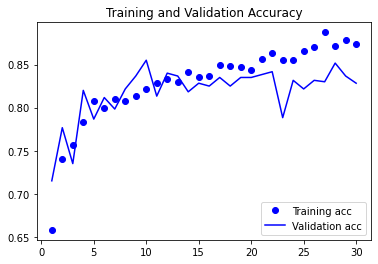

In [74]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# EPOCH AYARLAMA

In [5]:
history1 = model.fit_generator(
                training_set,
                steps_per_epoch = 100,
                epochs = 16,
                validation_data = test_set,
                validation_steps = 30)

Epoch 1/16


<ipython-input-5-8b9344e1cb63>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


100/100 [==============================] - 26s 255ms/step - loss: 0.6274 - acc: 0.6309 - val_loss: 0.5281 - val_acc: 0.7117
Epoch 2/16
100/100 [==============================] - 24s 244ms/step - loss: 0.4882 - acc: 0.7672 - val_loss: 0.4219 - val_acc: 0.7967
Epoch 3/16
100/100 [==============================] - 25s 248ms/step - loss: 0.4543 - acc: 0.7892 - val_loss: 0.4288 - val_acc: 0.7867
Epoch 4/16
100/100 [==============================] - 24s 244ms/step - loss: 0.4379 - acc: 0.7852 - val_loss: 0.3798 - val_acc: 0.8200
Epoch 5/16
100/100 [==============================] - 25s 246ms/step - loss: 0.4258 - acc: 0.7890 - val_loss: 0.3806 - val_acc: 0.8100
Epoch 6/16
100/100 [==============================] - 25s 247ms/step - loss: 0.4137 - acc: 0.8007 - val_loss: 0.3817 - val_acc: 0.8067
Epoch 7/16
100/100 [==============================] - 24s 244ms/step - loss: 0.4009 - acc: 0.8122 - val_loss: 0.3582 - val_acc: 0.8317
Epoch 8/16
100/100 [==============================] - 25s 253ms/st

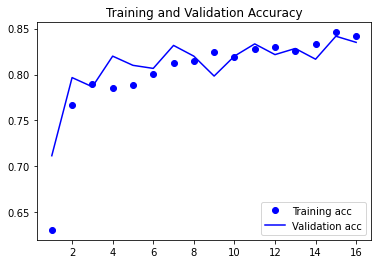

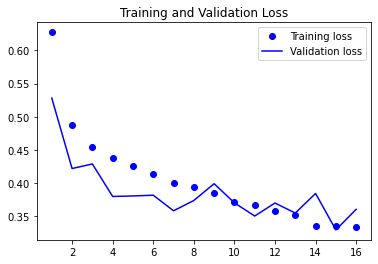

In [7]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# DROPOUT EKLEME

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [3]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [4]:
# CNN ve resimler
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
                training_set,
                steps_per_epoch = 100,
                epochs = 30,
                validation_data = test_set,
                validation_steps = 30)

Epoch 1/16


<ipython-input-5-399f8ff612bd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 27s 259ms/step - loss: 0.5993 - acc: 0.6750 - val_loss: 0.4840 - val_acc: 0.7350
Epoch 2/16
100/100 [==============================] - 25s 249ms/step - loss: 0.4929 - acc: 0.7431 - val_loss: 0.4321 - val_acc: 0.7750
Epoch 3/16
100/100 [==============================] - 25s 251ms/step - loss: 0.4487 - acc: 0.7787 - val_loss: 0.4436 - val_acc: 0.7567
Epoch 4/16
100/100 [==============================] - 25s 249ms/step - loss: 0.4320 - acc: 0.7932 - val_loss: 0.4193 - val_acc: 0.7833
Epoch 5/16
100/100 [==============================] - 25s 249ms/step - loss: 0.4291 - acc: 0.7877 - val_loss: 0.3943 - val_acc: 0.8117
Epoch 6/16
100/100 [==============================] - 25s 251ms/step - loss: 0.4107 - acc: 0.8075 - val_loss: 0.3809 - val_acc: 0.8183
Epoch 7/16
100/100 [==============================] - 26s 262ms/step - loss: 0.4060 - acc: 0.7937 - val_loss: 0.3818 - val_acc: 0.8267
Epoch 8/16
100/100 [==============================] - 25s 251ms/st

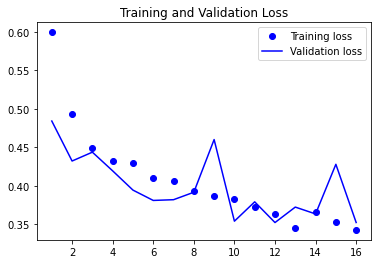

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# KATMAN VE DÜĞÜM SAYISI DEĞİŞTİRME

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [ ]:
# CNN ve resimler
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

In [ ]:
history = model.fit_generator(
                training_set,
                steps_per_epoch = 100,
                epochs = 30,
                validation_data = test_set,
                validation_steps = 30)

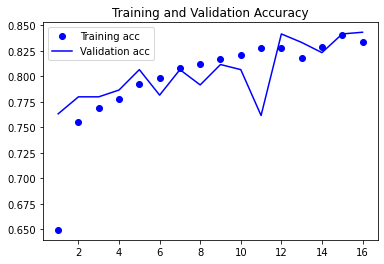

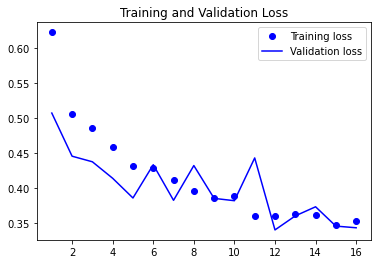

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# DATA AUGMENTATION

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [24]:
# CNN ve resimler
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [25]:
history = model.fit_generator(
                training_set,
                steps_per_epoch = 100,
                epochs = 30,
                validation_data = test_set,
                validation_steps = 30)

Epoch 1/16


<ipython-input-25-399f8ff612bd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 29s 280ms/step - loss: 0.6363 - acc: 0.6329 - val_loss: 0.5786 - val_acc: 0.6133
Epoch 2/16
100/100 [==============================] - 27s 274ms/step - loss: 0.5263 - acc: 0.7311 - val_loss: 0.4475 - val_acc: 0.7700
Epoch 3/16
100/100 [==============================] - 27s 273ms/step - loss: 0.4856 - acc: 0.7536 - val_loss: 0.4283 - val_acc: 0.7817
Epoch 4/16
100/100 [==============================] - 28s 278ms/step - loss: 0.4715 - acc: 0.7712 - val_loss: 0.4515 - val_acc: 0.7617
Epoch 5/16
100/100 [==============================] - 27s 273ms/step - loss: 0.4527 - acc: 0.7797 - val_loss: 0.4182 - val_acc: 0.7983
Epoch 6/16
100/100 [==============================] - 27s 273ms/step - loss: 0.4506 - acc: 0.7777 - val_loss: 0.3997 - val_acc: 0.7950
Epoch 7/16
100/100 [==============================] - 28s 276ms/step - loss: 0.4497 - acc: 0.7940 - val_loss: 0.4072 - val_acc: 0.7850
Epoch 8/16
100/100 [==============================] - 27s 273ms/st

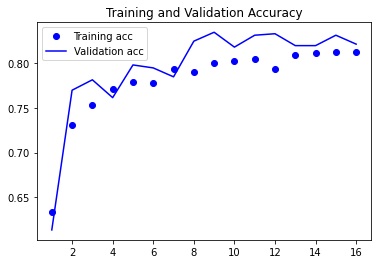

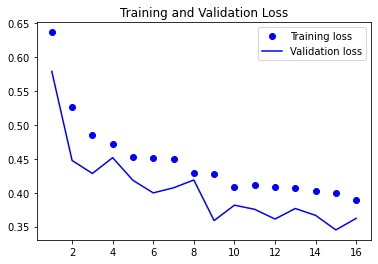

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# DÖRT YÖNTEMİ UYGULAMA

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [2]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [6]:
# CNN ve resimler
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
                training_set,
                steps_per_epoch = 100,
                epochs = 16,
                validation_data = test_set,
                validation_steps = 30)

<ipython-input-7-399f8ff612bd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/16
100/100 [==============================] - 44s 427ms/step - loss: 0.6428 - acc: 0.6179 - val_loss: 0.5414 - val_acc: 0.7117
Epoch 2/16
100/100 [==============================] - 36s 354ms/step - loss: 0.5335 - acc: 0.7275 - val_loss: 0.4551 - val_acc: 0.7733
Epoch 3/16
100/100 [==============================] - 35s 349ms/step - loss: 0.4969 - acc: 0.7580 - val_loss: 0.5290 - val_acc: 0.7533
Epoch 4/16
100/100 [==============================] - 35s 353ms/step - loss: 0.4707 - acc: 0.7672 - val_loss: 0.4552 - val_acc: 0.7783
Epoch 5/16
100/100 [==============================] - 35s 347ms/step - loss: 0.4649 - acc: 0.7682 - val_loss: 0.4877 - val_acc: 0.7700
Epoch 6/16
100/100 [==============================] - 37s 368ms/step - loss: 0.4526 - acc: 0.7810 - val_loss: 0.4215 - val_acc: 0.7700
Epoch 7/16
100/100 [==============================] - 37s 367ms/step - loss: 0.4547 - acc: 0.7922 - val_loss: 0.4539 - val_acc: 0.7467
Epoch 8/16
100/100 [==============================] - 3

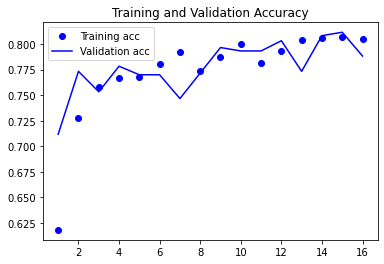

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()